In [1]:
import sys
limit = 100000000
sys.setrecursionlimit(limit)

In [2]:
# Read and load data from the text file
input_array_file = open("Quick_Sort.txt",'r')
input_array = input_array_file.read().split(" ")
input_array=[int(x) for x in input_array]

In [3]:
import statistics
def median_of_three_pivot(a):
    first_element = a[0]
    last_element = a[len(a)-1]
    if len(a)%2==0:
        middle_element = a[(len(a)//2)-1]
        middle_element_index = (len(a)//2)-1
    else:
        middle_element = a[len(a)//2]
        middle_element_index = len(a)//2
    median_element = statistics.median([first_element,middle_element,last_element])
    if first_element!=median_element:
        if median_element==middle_element:
            a[0]=middle_element
            a[middle_element_index]=first_element
        else:
            a[0]=last_element
            a[len(a)-1]=first_element
    return a

In [4]:
comparisons = 0
def quick_sort(a,n):
    global comparisons
    if n<=1:
        return (a,0)
    else:
        a,i = partition_median(a,n)
        a[:i],dummy = quick_sort(a[:i],len(a[:i]))
        comparisons = comparisons + (len(a[:i]))
        a[i+1:],dummy = quick_sort(a[i+1:],len(a[i+1:]))
        comparisons = comparisons + (len(a[i+1:]))
        return (a,comparisons)

In [5]:
def partition_median(a,n): 
    a = median_of_three_pivot(a)
    p = first_element_pivot(a)
    i=1
    for j in range(1,n):
        if a[j]<p:
            swap_element = a[j]
            a[j]= a[i]
            a[i]= swap_element
            i=i+1
    first=a[0]
    a[0]=a[i-1]
    a[i-1]=first
    return (a,i-1)

In [6]:
def first_element_pivot(a):
    return a[0]

In [7]:
sorted_input_array, no_of_comparisons = quick_sort(input_array[:],len(input_array[:]))
print("Number of Comparisons: ",no_of_comparisons)

Number of Comparisons:  138382


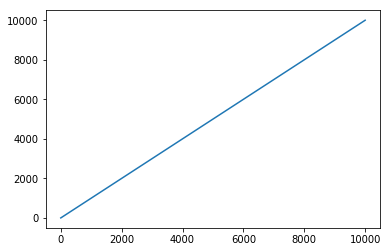

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(sorted_input_array)
plt.show()